In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

DOING ALL AT ONCE


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load training data
train_df = pd.read_csv('./train.csv')



In [37]:
train_df

,Feature1,Feature2,Feature3,Feature4,Label
0,26.303954,True,59.919036,126.853479,170.361411
1,19.646076,False,34.504636,108.363933,29.897337
2,36.983463,False,98.503396,5.085491,373.460027
3,36.516512,False,38.418101,1.173449,26.696336
4,28.734387,False,99.286184,29.123061,332.682539
...,...,...,...,...,...
235,31.769066,False,189.379552,0.002523,1277.121058
236,28.015702,True,85.468516,61.646937,304.899057
237,31.477720,False,0.360471,19.738584,26.351808
238,27.198042,False,48.290593,18.924597,102.047530


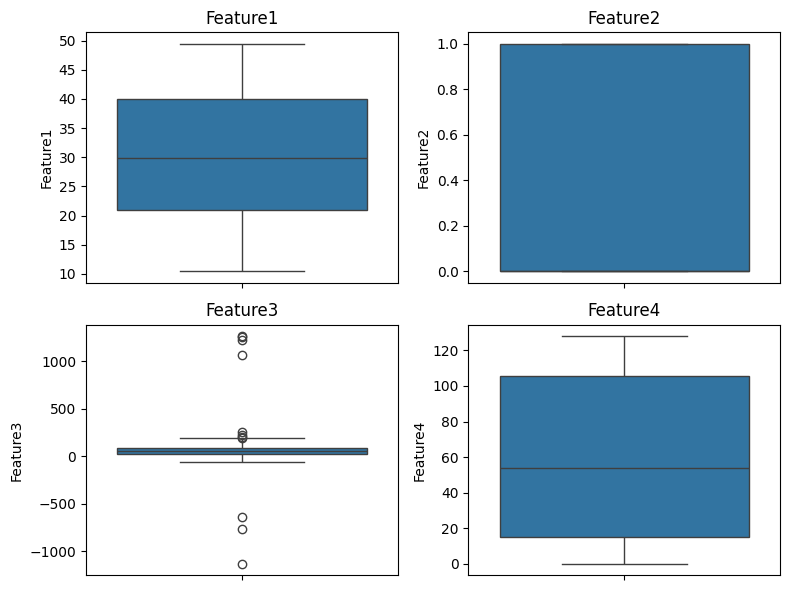

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
sns.boxplot(ax=axes[0, 0], data=train_df['Feature1'])
axes[0, 0].set_title('Feature1')
sns.boxplot(ax=axes[0, 1], data=train_df['Feature2'])
axes[0, 1].set_title('Feature2')
sns.boxplot(ax=axes[1, 0], data=train_df['Feature3'])
axes[1, 0].set_title('Feature3')
sns.boxplot(ax=axes[1, 1], data=train_df['Feature4'])
axes[1, 1].set_title('Feature4')
plt.tight_layout()
plt.show()

In [41]:
# Handle missing values
train_df['Feature1'].fillna(train_df['Feature1'].mean(), inplace=True)
train_df['Feature4'].fillna(train_df['Feature4'].mean(), inplace=True)

# Outlier detection and removal for Feature3
Q1 = train_df['Feature3'].quantile(0.25)
Q3 = train_df['Feature3'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train_df['Feature3'] = train_df['Feature3'].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)
train_df.dropna(subset=['Feature3'], inplace=True)
train_df.reset_index(drop=True, inplace=True)





Text(0.5, 1.0, 'Feature3 after removing outliers')

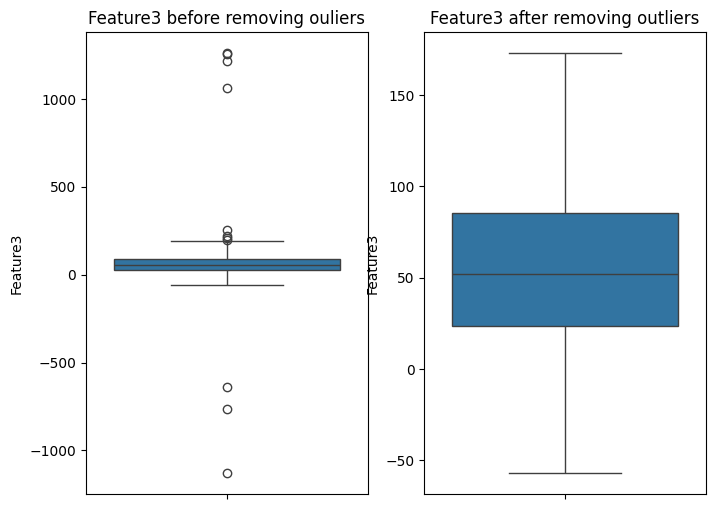

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
sns.boxplot(ax=axes[0], data=dff)
axes[0].set_title('Feature3 before removing ouliers')
sns.boxplot(ax=axes[1], data=train_df['Feature3'])
axes[1].set_title('Feature3 after removing outliers')

In [43]:
# Convert Feature2 to integer
train_df['Feature2'] = train_df['Feature2'].astype(int)



In [45]:
# Separate features (X) and target (y)
X = train_df.drop(columns=['Label'])
y = train_df['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [66]:

# Pipeline with PolynomialFeatures and Ridge or Lasso regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso



In [67]:
# Grid search for polynomial regression
poly_orders = [2, 3, 5, 8, 12]
param_grid = {
    'poly_features__degree': poly_orders,
    'model__alpha': [0.01, 0.1, 1, 10, 100]  # For Ridge and Lasso
}


In [68]:
# Define pipelines for Ridge and Lasso regression
ridge_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

lasso_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', Lasso())
])

In [69]:
# Perform grid search for Ridge regression
ridge_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_search.fit(X_train_scaled, y_train)
best_ridge_model = ridge_search.best_estimator_

# Perform grid search for Lasso regression
lasso_search = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search.fit(X_train_scaled, y_train)
best_lasso_model = lasso_search.best_estimator_

In [72]:
# Evaluate the best Ridge model
y_pred_ridge = best_ridge_model.predict(X_test_scaled)
print(f"Best Ridge Model Parameters: {ridge_search.best_params_}")
print(f"Ridge R2 Score: {r2_score(y_test, y_pred_ridge)}")
print(f"Ridge Mean Squared Error: {mean_squared_error(y_test, y_pred_ridge)}")

# Evaluate the best Lasso model
y_pred_lasso = best_lasso_model.predict(X_test_scaled)
print(f"Best Lasso Model Parameters: {lasso_search.best_params_}")
print(f"Lasso R2 Score: {r2_score(y_test, y_pred_lasso)}")
print(f"Lasso Mean Squared Error: {mean_squared_error(y_test, y_pred_lasso)}")

Best Ridge Model Parameters: {'model__alpha': 1, 'poly_features__degree': 2}
Ridge R2 Score: 0.9476412404290883
Ridge Mean Squared Error: 2902.321382909269
Best Lasso Model Parameters: {'model__alpha': 10, 'poly_features__degree': 2}
Lasso R2 Score: 0.9556504881858288
Lasso Mean Squared Error: 2458.357255112774


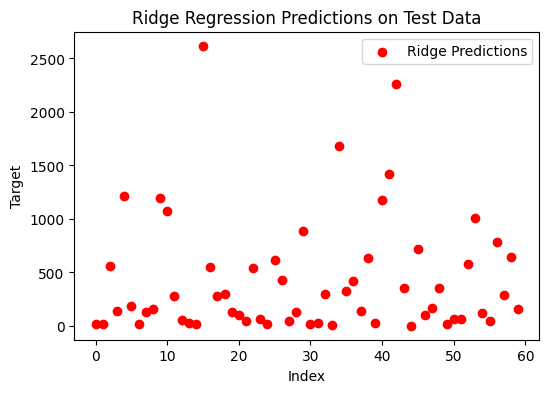

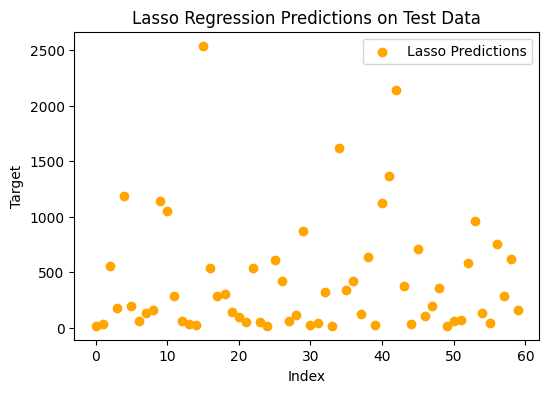

In [73]:
# Load and preprocess test data
test_df = pd.read_csv('./test.csv')
test_df['Feature2'] = test_df['Feature2'].astype(int)
test_df_2 = test_df.iloc[:, 1:]

# Transform test data
X_test_scaled_2 = scaler.transform(test_df_2)

# Predictions on test data using the best models
y_pred_poly_test = best_ridge_model.predict(X_test_scaled_2)  # Example using Ridge
y_pred_lasso_test = best_lasso_model.predict(X_test_scaled_2)

# Plot predictions
index2 = np.arange(len(test_df_2))
plt.figure(figsize=(6, 4))
plt.scatter(index2, y_pred_poly_test, color='red', label='Ridge Predictions')
plt.title('Ridge Regression Predictions on Test Data')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(index2, y_pred_lasso_test, color='orange', label='Lasso Predictions')
plt.title('Lasso Regression Predictions on Test Data')
plt.xlabel('Index')
plt.ylabel('Target')
plt.legend()
plt.show()

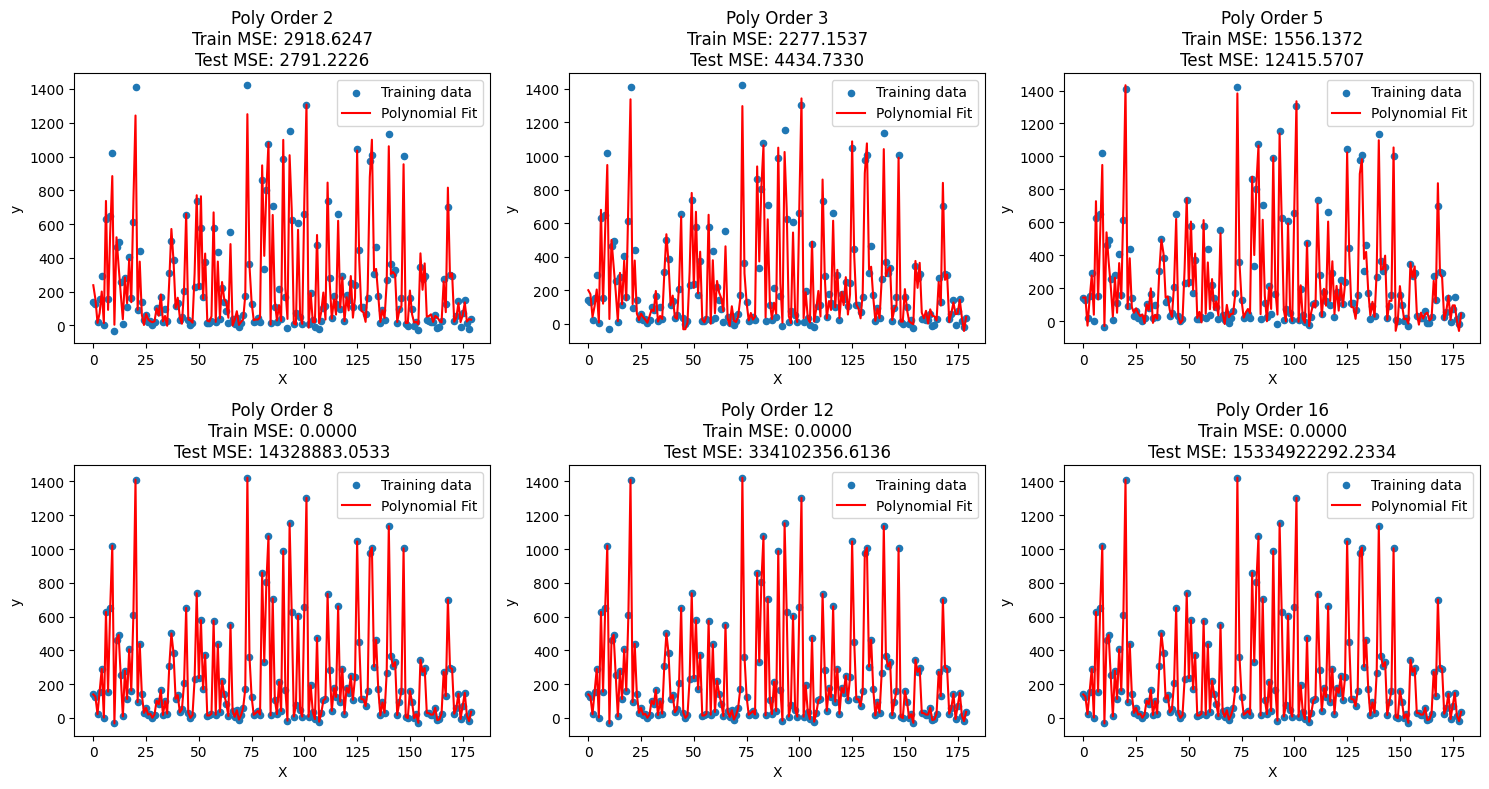

In [83]:
orders = [2, 3, 5, 8, 12,16]

#for storing the training and testing errors for each polynomial order
train_errors = []
test_errors = []

#number of rows and columns for the subplot grid
num_rows = 2
num_cols = 3

#creating the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

for i, order in enumerate(orders):

    #to get the row and col number of the subplot
    row = i // num_cols
    col = i % num_cols

    #create and instance of polynomialfeatures with the specified degree
    poly_features = PolynomialFeatures(degree=order)

    X_poly_train = poly_features.fit_transform(X_train_scaled)

    X_poly_test = poly_features.transform(X_test_scaled)

    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)
    poly_pred_train = poly_model.predict(X_poly_train)
    poly_pred_test = poly_model.predict(X_poly_test)

    train_mse = mean_squared_error(y_train, poly_pred_train)
    test_mse = mean_squared_error(y_test, poly_pred_test)

    train_errors.append(train_mse)
    test_errors.append(test_mse)

    index=np.arange(len(y_train))
    ax = axes[row, col]
    ax.scatter(index, y_train, s=20, label="Training data")
    ax.plot(index, poly_pred_train[index], color='red', label="Polynomial Fit")
    ax.set_title(f"Poly Order {order}\nTrain MSE: {train_mse:.4f}\nTest MSE: {test_mse:.4f}")
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.legend()

# Hide any empty subplots
for i in range(len(orders), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [78]:
df = pd.DataFrame(y_pred_poly_test, columns=['Label'])
df.index.name = 'id'  # Set the index name to 'id'
df.reset_index(inplace=True)  # Reset the index to turn it into a column

In [79]:
df

,id,Label
0,0,19.958223
1,1,19.913585
2,2,558.176296
3,3,138.193610
4,4,1211.792250
5,5,188.695928
6,6,21.689858
7,7,130.317016
8,8,160.575293
9,9,1199.570422


In [65]:
df.to_csv('y_pred_ridge_17.csv', index=False)